In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#**Install darknet**

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2


In [ ]:
!rm -rf darknet #Xóa thư mục darknet nếu có 
!git clone https://github.com/AlexeyAB/darknet #Tải model về Drive 

Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 1 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.06 MiB | 4.93 MiB/s, done.
Resolving deltas: 100% (10362/10362), done.
Checking out files: 100% (2050/2050), done.


In [ ]:
%cd ./darknet/

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet


In [ ]:
# !rm -rf data #Xóa thư mục data trong thư mục darknet 
!mkdir backup # tạo thư mục backup để lưu các file trọng số sau đào tạo 

#**Copy data**

In [ ]:
import os
import shutil
import glob2

In [ ]:
%cd ./data

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet/data


In [ ]:
!mkdir train
!mkdir valid
!mkdir test

In [ ]:
def copy_all(path_copy_from, path_copy_to):
    lst_file = os.listdir(path_copy_from)
    for f in lst_file:
        f_from = os.path.join(path_copy_from, f)
        f_to = os.path.join(path_copy_to, f)
        shutil.copy(f_from, f_to)
        print(f"Copy {f}")

In [ ]:
copy_all('/content/drive/MyDrive/CS331_Nhóm/Datasets_Recog/Image/Train/', '/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train')
copy_all('/content/drive/MyDrive/CS331_Nhóm/Datasets_Recog/Label/Train/', '/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train')
copy_all('/content/drive/MyDrive/CS331_Nhóm/Datasets_Recog/Image/Test/', '/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test')
copy_all('/content/drive/MyDrive/CS331_Nhóm/Datasets_Recog/Label/Test/', '/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test')
copy_all('/content/drive/MyDrive/CS331_Nhóm/Datasets_Recog/Image/Validation/', '/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid')
copy_all('/content/drive/MyDrive/CS331_Nhóm/Datasets_Recog/Label/Validation/', '/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid')


In [ ]:
len(os.listdir("/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train"))

2096

In [ ]:
len(os.listdir("/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid"))

700

In [ ]:
len(os.listdir("/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test"))

700

#**Create txt**

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train
path = "/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train"

types = ('*.jpg', '*.png', '*.jpeg')
# path_txt = glob2.glob("*.txt")
path_img = list()
for type_ in types:
  path_img.extend(glob2.glob(type_))

with open("/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/train.txt","w") as f:
  for img in path_img:
    image_files = os.path.join(path, img)
    print(image_files)
    #tìm kiếm các file có đuôi dạng: png, jpeg, jpg trong thư mục
    if (os.path.exists(str(image_files[:-3]) + "txt")) or (os.path.exists(str(image_files[:-4]) + "txt")):
      f.write(image_files+'\n')
    #lưu tất cả các file vào biến files

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/565.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/1698.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/1081.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/1527.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/825.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/101.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/1501.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/1422.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/553.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/train/918.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/d

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid
path = "/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid"

types = ('*.jpg', '*.png', '*.jpeg')
# path_txt = glob2.glob("*.txt")
path_img = list()
for type_ in types:
  path_img.extend(glob2.glob(type_))

with open("/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/valid.txt","w") as f:
  for img in path_img:
    image_files = os.path.join(path, img)
    print(image_files)
    #tìm kiếm các file có đuôi dạng: png, jpeg, jpg trong thư mục
    if (os.path.exists(str(image_files[:-3]) + "txt")) or (os.path.exists(str(image_files[:-4]) + "txt")):
      f.write(image_files+'\n')
    #lưu tất cả các file vào biến files

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/1268.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/264.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/1713.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/1196.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/1470.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/1047.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/1284.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/276.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/1140.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/valid/1573.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darkne

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test
path = "/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test"

types = ('*.jpg', '*.png', '*.jpeg')
# path_txt = glob2.glob("*.txt")
path_img = list()
for type_ in types:
  path_img.extend(glob2.glob(type_))

with open("/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/test.txt","w") as f:
  for img in path_img:
    image_files = os.path.join(path, img)
    print(image_files)
    #tìm kiếm các file có đuôi dạng: png, jpeg, jpg trong thư mục
    if (os.path.exists(str(image_files[:-3]) + "txt")) or (os.path.exists(str(image_files[:-4]) + "txt")):
      f.write(image_files+'\n')
    #lưu tất cả các file vào biến files

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/1205.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/372.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/257.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/982.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/1610.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/268.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/510.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/997.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/182.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/1181.jpg
/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/923.

#**Pre-training**

Tạo crnet.names, crnet.data

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet


Tạo crnet.cfg

In [ ]:
import cv2 as cv
img = cv.imread("/content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet/data/test/1082.jpg")
print(img.shape)

(71, 84, 3)


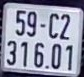

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

#**Training**

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet
!rm darknet
!make

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalization_layer.o obj/avgpool_layer.o obj/coco.o obj/dice.o o

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet
!./darknet detector train crnet.data cfg/crnet.cfg -dont_show -map

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Region Avg IOU: 0.880068, Class: 0.997191, Obj: 0.860213, No Obj: 0.012684, Avg Recall: 1.000000,  count: 69
Region Avg IOU: 0.872334, Class: 0.992885, Obj: 0.841298, No Obj: 0.015516, Avg Recall: 1.000000,  count: 71

 (next mAP calculation at 32300 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.50 = 99.87 %, best = 99.96 % ]2;32299/62000: loss=0.3 map=1.00 best=1.00 hours left=6.1
 32299: 0.335490, 0.325920 avg loss, 0.001000 rate, 0.459904 seconds, 2067136 images, 6.093798 hours left
Loaded: 0.000042 seconds
Region Avg IOU: 0.856725, Class: 0.999223, Obj: 0.875540, No Obj: 0.013422, Avg Recall: 1.000000,  count: 66
Region Avg IOU: 0.858471, Class: 0.970417, Obj: 0.857897, No Obj: 0.015821, Avg Recall: 1.000000,  count: 66
Region Avg IOU: 0.877124, Class: 0.997945, Obj: 0.864882, No Obj: 0.015125, Avg Recall: 1.000000,  count: 69
Region Avg IOU: 0.845171, Class: 0.974692, Obj: 0.851808, No Obj: 0.013879, Avg Recal

In [ ]:
!./darknet detector train crnet.data cfg/crnet.cfg backup/crnet_last.weights -dont_show -map

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.

 (next mAP calculation at 35500 iterations) 

 Tensor Cores are used.
 Last accuracy mAP@0.50 = 99.85 %, best = 99.88 % ]2;35488/62000: loss=0.2 map=1.00 best=1.00 hours left=5.2
 35488: 0.175237, 0.239624 avg loss, 0.000100 rate, 0.493887 seconds, 2271232 images, 5.182396 hours left
Loaded: 0.000046 seconds
Region Avg IOU: 0.870685, Class: 0.998387, Obj: 0.878718, No Obj: 0.015459, Avg Recall: 1.000000,  count: 69
Region Avg IOU: 0.879143, Class: 0.995495, Obj: 0.859506, No Obj: 0.014544, Avg Recall: 1.000000,  count: 67
Region Avg IOU: 0.875711, Class: 0.999373, Obj: 0.852046, No Obj: 0.012750, Avg Recall: 1.000000,  count: 65
Region Avg IOU: 0.877899, Class: 0.998362, Obj: 0.861205, No Obj: 0.013675, Avg Recall: 1.000000,  count: 69
Region Avg IOU: 0.889336, Class: 0.999299, Obj: 0.875227, No Obj: 0.014291, Avg Recall: 1.000000,  count: 71
Region Avg IOU: 0.865327, Class: 0.989304, Obj: 0.856659, No Obj: 0.014092, Avg Recal

#**Predict**

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet
!rm darknet
!make

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalization_layer.o obj/avgpool_layer.o obj/coco.o obj/dice.o o

In [ ]:
# !./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>  #chỉnh lại <path to image>
!./darknet detector test crnet.data cfg/crnet.cfg backup/crnet_best.weights data/test/816.jpg


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    352 x 128 x   3 ->  352 x 128 x  32 0.078 BF
   1 max                2x 2/ 2    352 x 128 x  32 ->  176 x  64 x  32 0.001 BF
   2 conv     64       3 x 3/ 1    176 x  64 x  32 ->  176 x  64 x  64 0.415 BF
   3 max                2x 2/ 2    176 x  64 x  64 ->   88 x  32 x  64 0.001 BF
   4 conv    128       3 x 3/ 1     88 x  32 x  64 ->   88 x  32 x 128 0.415 BF
   5 conv     64       1 x 1/ 1     88 x  32 x 128 ->   88 x  32 x  64 0.046 BF
   6 conv    128       3 x 3/ 1     88 x  32 x  64 ->   88 x  32 x 128 0.415 BF
   7 max                2x 2/ 2     88 x  32 x 128 ->   44 x  16 x 128 

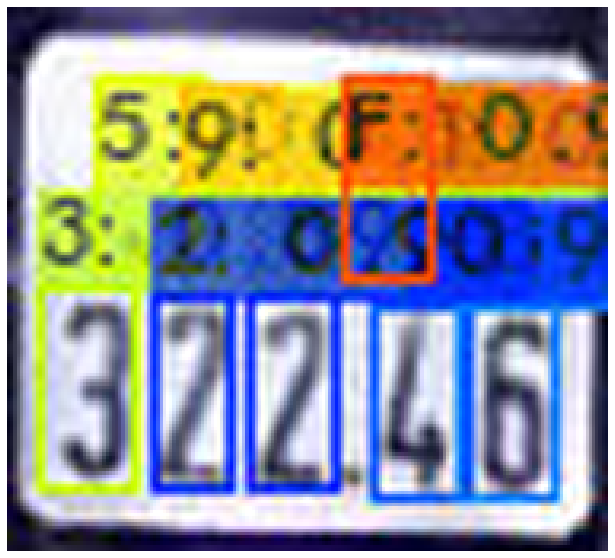

In [ ]:
imShow('predictions.jpg')

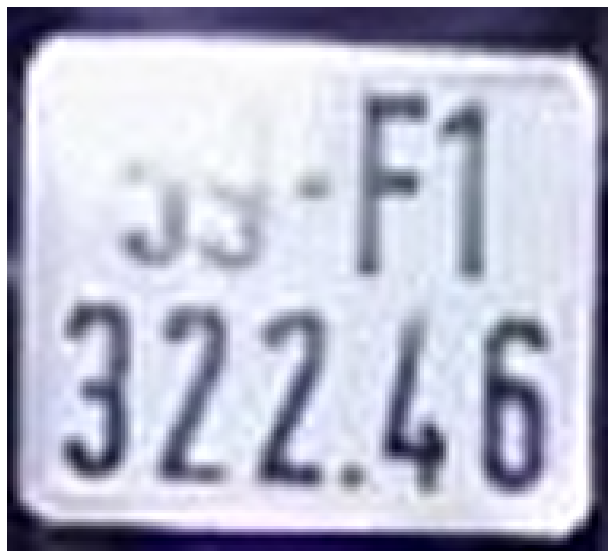

In [ ]:
imShow('./data/test/816.jpg')

#**Evaluation**

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet
!rm darknet
!make

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF obj/image_opencv.o obj/http_stream.o obj/gemm.o obj/utils.o obj/dark_cuda.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/network.o obj/connected_layer.o obj/cost_layer.o obj/parser.o obj/option_list.o obj/darknet.o obj/detection_layer.o obj/captcha.o obj/route_layer.o obj/writing.o obj/box.o obj/nightmare.o obj/normalization_layer.o obj/avgpool_layer.o obj/coco.o obj/dice.o o

In [ ]:
%cd /content/drive/MyDrive/CS331_Nhóm/Train_Test_Recog_2/darknet
!./darknet detector map crnet.data cfg/crnet.cfg backup/crnet_best.weights

/content/drive/.shortcut-targets-by-id/1C2ANFmb2-CSd_uU9uho9AEo6eNOlep45/CS331_Nhóm/Train_Test_Recog_2/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    352 x 128 x   3 ->  352 x 128 x  32 0.078 BF
   1 max                2x 2/ 2    352 x 128 x  32 ->  176 x  64 x  32 0.001 BF
   2 conv     64       3 x 3/ 1    176 x  64 x  32 ->  176 x  64 x  64 0.415 BF
   3 max                2x 2/ 2    176 x  64 x  64 ->   88 x  32 x  64 0.001 BF
   4 conv    128       3 x 3/ 1     88 x  32 x  64 ->   88 x  32 x 128 0.415 BF
   5 conv     64       1 x 1/ 1     88 x  32 x 128 ->   88 x  32 x  64 0.046 BF
   6 conv    128       3 x 3/ 1     88 x